In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [203]:
#Store the data into a data frame
df=pd.read_excel("/content/data.xlsx")
# Print the first 5 rows of data
df.head()

,Age,Gender,MonthlyIncome,Department,NumCompaniesWorked,Over18,workingfromhome,BusinessTravel,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,complaintresolved,complaintyears,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
0,31,Female,low,Research & Development,1,Y,0,Travel_Rarely,2,40,4,1,Y,0.0,11,1,1,1,0,No
1,32,Male,low,Research & Development,0,Y,0,Travel_Frequently,2,40,4,0,NaN,NaN,13,2,8,7,3,No
2,34,Female,medium,Research & Development,3,Y,1,Travel_Rarely,8,40,1,0,NaN,NaN,14,3,7,0,0,No
3,49,Male,high,Research & Development,4,Y,0,Travel_Rarely,1,40,3,0,NaN,NaN,14,3,23,8,0,No
4,27,Male,medium,Research & Development,1,Y,0,Travel_Rarely,19,40,1,0,NaN,NaN,11,1,7,7,0,No


In [204]:
# Checking the shape and size of the dataset
df.shape, df.size

((1474, 20), 29480)

In [205]:
# Get information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1474 non-null   int64  
 1   Gender                   1474 non-null   object 
 2   MonthlyIncome            1474 non-null   object 
 3   Department               1474 non-null   object 
 4   NumCompaniesWorked       1474 non-null   int64  
 5   Over18                   1474 non-null   object 
 6   workingfromhome          1474 non-null   int64  
 7   BusinessTravel           1474 non-null   object 
 8   DistanceFromHome         1474 non-null   int64  
 9   StandardHours            1474 non-null   int64  
 10  JobSatisfaction          1474 non-null   int64  
 11  complaintfiled           1474 non-null   int64  
 12  complaintresolved        294 non-null    object 
 13  complaintyears           263 non-null    float64
 14  PercentSalaryHike       

In [206]:
#Get a  count of the null/ missing values for each column 
df.isnull().sum()

Age                           0
Gender                        0
MonthlyIncome                 0
Department                    0
NumCompaniesWorked            0
Over18                        0
workingfromhome               0
BusinessTravel                0
DistanceFromHome              0
StandardHours                 0
JobSatisfaction               0
complaintfiled                0
complaintresolved          1180
complaintyears             1211
PercentSalaryHike             0
PerformanceRating             0
TotalWorkingYears             0
YearsAtCompany                0
YearsSinceLastPromotion       0
Left                          0
dtype: int64

In [207]:
# View some statistics
df.describe()

,Age,NumCompaniesWorked,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,complaintyears,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.0,1474.000000,1474.000000,263.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,36.945047,2.695387,0.456581,9.200136,40.0,2.731343,0.199457,1.106464,15.204885,2.871099,11.291045,7.008820,2.190638
std,9.153312,2.501083,0.498280,8.115843,0.0,1.102861,0.399728,1.020812,3.656512,1.399134,7.785923,6.120918,3.221768
min,18.000000,0.000000,0.000000,1.000000,40.0,1.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,0.000000,2.000000,40.0,2.000000,0.000000,0.000000,12.000000,2.000000,6.000000,3.000000,0.000000
50%,36.000000,2.000000,0.000000,7.000000,40.0,3.000000,0.000000,1.000000,14.000000,3.000000,10.000000,5.000000,1.000000
75%,43.000000,4.000000,1.000000,14.000000,40.0,4.000000,0.000000,2.000000,18.000000,4.000000,15.000000,9.000000,3.000000
max,60.000000,9.000000,1.000000,29.000000,40.0,4.000000,1.000000,4.000000,25.000000,5.000000,40.000000,40.000000,15.000000


In [208]:
#Get a count of the number of employees that stayed and left the company
df['Left'].value_counts()

No     1233
Yes     241
Name: Left, dtype: int64

<Axes: xlabel='Left', ylabel='count'>

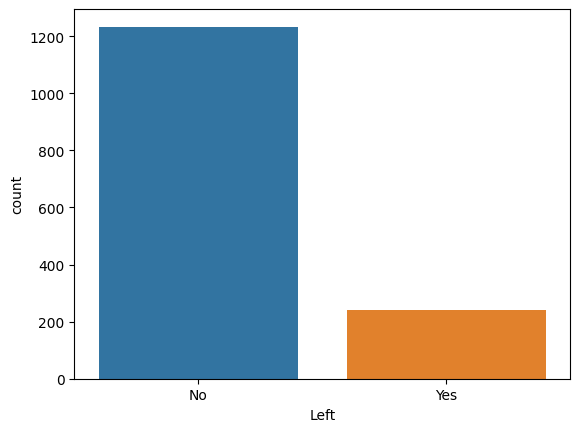

In [209]:
#Visualize the number of employees that stayed and left the company
sns.countplot(x='Left', data=df)

<Axes: xlabel='Age', ylabel='count'>

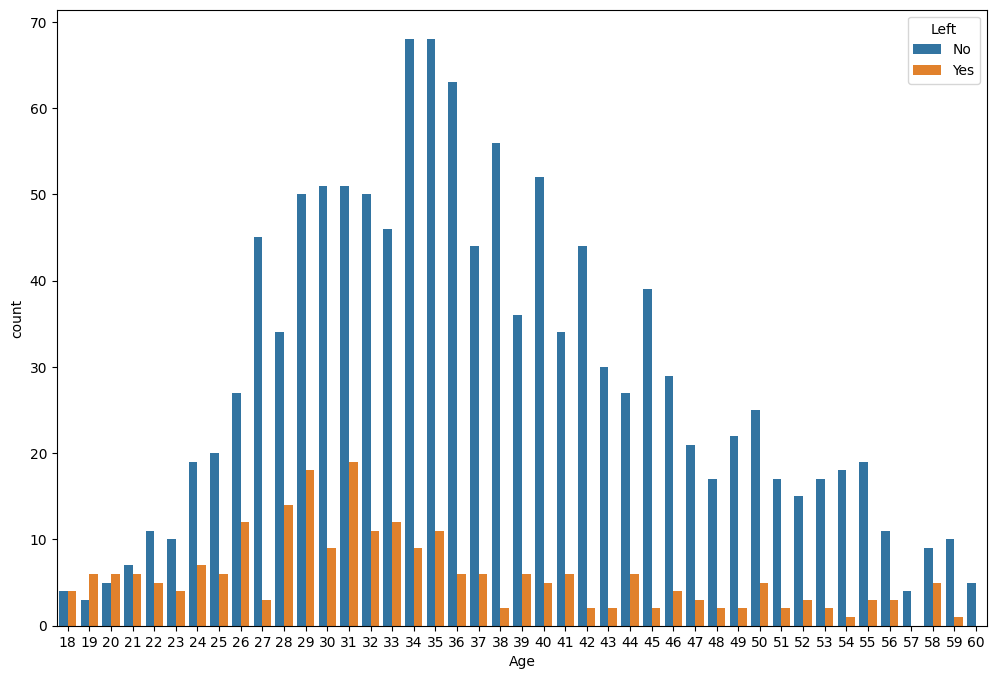

In [210]:
#Show the number of employees that left and stayed by age
plt.figure(figsize=(12,8))
sns.countplot(x='Age', hue='Left', data=df)


In [211]:
#Print all of the data types and their unique values
for column in df.columns:
  if df[column].dtypes==object:
    print(str(column)+' : '+ str(df[column].unique()))
    print(df[column].value_counts())
    print('_______________________')

Gender : ['Female' 'Male']
Male      883
Female    591
Name: Gender, dtype: int64
_______________________
MonthlyIncome : ['low' 'medium' 'high']
medium    636
low       473
high      365
Name: MonthlyIncome, dtype: int64
_______________________
Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    963
Sales                     447
Human Resources            64
Name: Department, dtype: int64
_______________________
Over18 : ['Y']
Y    1474
Name: Over18, dtype: int64
_______________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1044
Travel_Frequently     278
Non-Travel            152
Name: BusinessTravel, dtype: int64
_______________________
complaintresolved : ['Y' nan 'N']
Y    206
N     88
Name: complaintresolved, dtype: int64
_______________________
Left : ['No' 'Yes']
No     1233
Yes     241
Name: Left, dtype: int64
_______________________


In [212]:
#Remove some  useless columns
df=df.drop(['Over18','StandardHours', 'complaintyears', 'complaintresolved'], axis=1)

In [213]:
# Get the correlation
df.corr()

<ipython-input-213-2fabfd11ee64>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,NumCompaniesWorked,workingfromhome,DistanceFromHome,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
Age,1.000000,0.302426,-0.074278,-0.005417,-0.003346,0.017285,0.002710,0.017364,0.681121,0.310197,0.215280
NumCompaniesWorked,0.302426,1.000000,-0.035951,-0.032112,-0.054547,-0.000980,-0.010616,-0.010258,0.240854,-0.119292,-0.038031
workingfromhome,-0.074278,-0.035951,1.000000,0.044875,-0.038537,-0.014434,0.019045,0.014364,-0.044425,-0.021132,0.007063
DistanceFromHome,-0.005417,-0.032112,0.044875,1.000000,-0.001953,-0.019847,0.039590,0.030732,0.002483,0.009230,0.011392
JobSatisfaction,-0.003346,-0.054547,-0.038537,-0.001953,1.000000,0.006137,0.018878,0.024618,-0.018559,-0.004174,-0.017102
complaintfiled,0.017285,-0.000980,-0.014434,-0.019847,0.006137,1.000000,0.022650,0.004730,0.019072,0.013154,0.002611
PercentSalaryHike,0.002710,-0.010616,0.019045,0.039590,0.018878,0.022650,1.000000,0.938976,-0.021006,-0.035965,-0.021932
PerformanceRating,0.017364,-0.010258,0.014364,0.030732,0.024618,0.004730,0.938976,1.000000,-0.021731,-0.042119,-0.041082
TotalWorkingYears,0.681121,0.240854,-0.044425,0.002483,-0.018559,0.019072,-0.021006,-0.021731,1.000000,0.625669,0.403341
YearsAtCompany,0.310197,-0.119292,-0.021132,0.009230,-0.004174,0.013154,-0.035965,-0.042119,0.625669,1.000000,0.617896


<ipython-input-214-2f6ba83e7db2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.0%')


<Axes: >

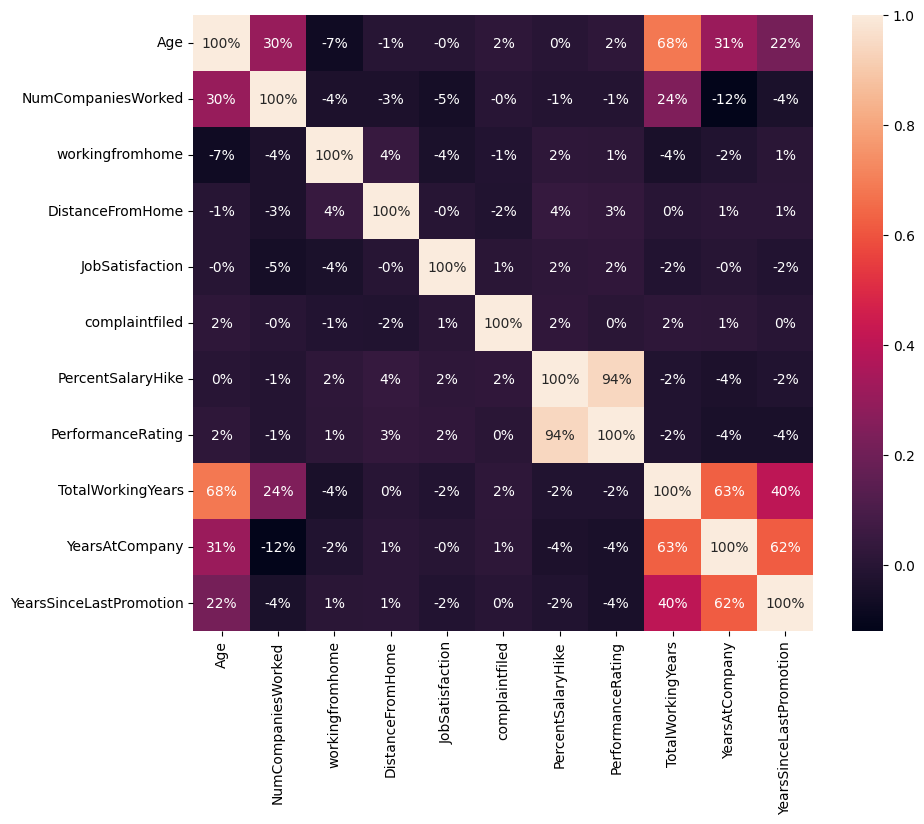

In [214]:
#Vizualize the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [215]:
#Transform the data
#Transform non-numerical into numerical col
for column in df.columns:
  if df[column].dtype==np.number:
    continue
  df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-215-0f303e3c86ff>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-215-0f303e3c86ff>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-215-0f303e3c86ff>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-215-0f303e3c86ff>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-215-0f303e3c86ff>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecate

In [216]:
#Creat a new column
df['Age_Years']=df['Age']

In [217]:
#Drop the age column
df=df.drop('Age', axis=1)

In [218]:
#Show the dataframe
df

,Gender,MonthlyIncome,Department,NumCompaniesWorked,workingfromhome,BusinessTravel,DistanceFromHome,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left,Age_Years
0,0,1,1,1,0,2,1,3,1,0,0,1,1,0,0,13
1,1,1,1,0,0,1,1,3,0,2,1,8,7,3,0,14
2,0,2,1,3,1,2,7,0,0,3,2,7,0,0,0,16
3,1,0,1,4,0,2,0,2,0,3,2,23,8,0,0,31
4,1,2,1,1,0,2,18,0,0,0,0,7,7,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,1,1,1,1,1,1,8,3,0,1,1,4,4,1,0,19
1470,0,1,1,9,0,2,4,0,0,3,1,6,1,0,0,18
1471,0,2,1,2,0,2,0,0,1,3,2,17,3,0,0,19
1472,1,1,1,1,1,2,24,2,0,1,0,1,1,0,1,8


In [219]:
X=df.drop('Left', axis=1)
y=df['Left']

In [220]:
#Split the data into 75% training and 25% tseting
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=0)

In [221]:
#Use the Random Forest Classifier
random_forest=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [222]:
#Get the accuracy on the training data set
random_forest.score(X_train,y_train)

0.971945701357466

In [223]:
#Show the classification_report for the test data
print(classification_report(random_forest.predict(X_test),y_test))


              precision    recall  f1-score   support

           0       0.99      0.85      0.91       361
           1       0.07      0.50      0.12         8

    accuracy                           0.84       369
   macro avg       0.53      0.67      0.52       369
weighted avg       0.97      0.84      0.89       369



In [224]:
#Use Logistic Regression and  show the classification_report for the test data
log_r = LogisticRegression()
log_r.fit(X_train,y_train)
print(classification_report(log_r.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       367
           1       0.00      0.00      0.00         2

    accuracy                           0.83       369
   macro avg       0.50      0.42      0.45       369
weighted avg       0.99      0.83      0.90       369



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
